<a href="https://colab.research.google.com/github/xHeput/neural_networks/blob/main/Recursive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [15]:
# Load the data
data = pd.read_csv('waluty.csv', delimiter=';', encoding='latin1', parse_dates=['Data'], dayfirst=True)

# Sort the data by date
data.sort_values('Data', inplace=True)

# Use only the 'Kurs' column for prediction
kurs = data[['Kurs']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_kurs = scaler.fit_transform(kurs)


Testing configuration: {'look_back': 5, 'epochs': 50, 'activation': 'relu', 'split_ratio': 0.8}
Epoch 1/50
764/764 - 11s - loss: 0.0079 - val_loss: 0.0142 - 11s/epoch - 14ms/step
Epoch 2/50
764/764 - 4s - loss: 0.0023 - val_loss: 0.0017 - 4s/epoch - 6ms/step
Epoch 3/50
764/764 - 6s - loss: 0.0018 - val_loss: 0.0018 - 6s/epoch - 8ms/step
Epoch 4/50
764/764 - 5s - loss: 0.0015 - val_loss: 0.0012 - 5s/epoch - 6ms/step
Epoch 5/50
764/764 - 5s - loss: 0.0014 - val_loss: 0.0012 - 5s/epoch - 6ms/step
Epoch 6/50
764/764 - 5s - loss: 0.0013 - val_loss: 0.0010 - 5s/epoch - 6ms/step
Epoch 7/50
764/764 - 4s - loss: 0.0012 - val_loss: 0.0025 - 4s/epoch - 6ms/step
Epoch 8/50
764/764 - 6s - loss: 0.0011 - val_loss: 0.0025 - 6s/epoch - 7ms/step
Epoch 9/50
764/764 - 5s - loss: 8.6683e-04 - val_loss: 0.0011 - 5s/epoch - 6ms/step
Epoch 10/50
764/764 - 5s - loss: 7.8618e-04 - val_loss: 0.0044 - 5s/epoch - 6ms/step
Epoch 11/50
764/764 - 5s - loss: 7.0553e-04 - val_loss: 9.9207e-04 - 5s/epoch - 7ms/step
Epo

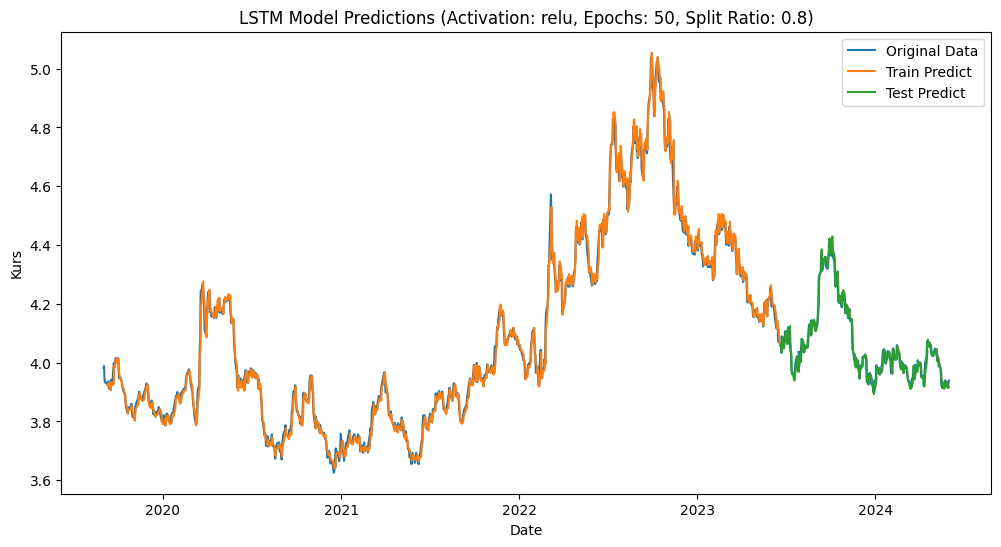

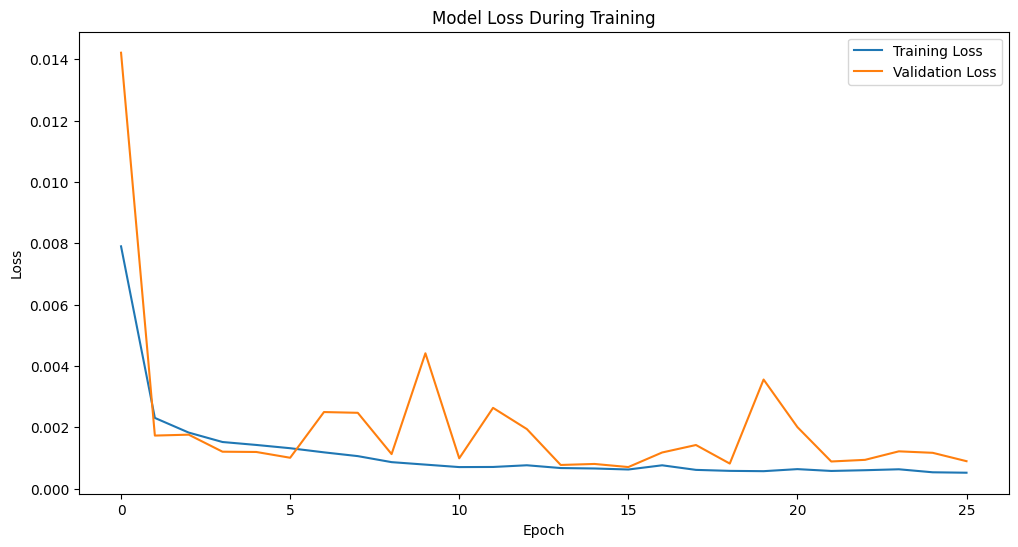

Testing configuration: {'look_back': 5, 'epochs': 100, 'activation': 'tanh', 'split_ratio': 0.8}
Epoch 1/100
764/764 - 12s - loss: 0.0038 - val_loss: 0.0015 - 12s/epoch - 16ms/step
Epoch 2/100
764/764 - 5s - loss: 0.0019 - val_loss: 0.0018 - 5s/epoch - 7ms/step
Epoch 3/100
764/764 - 5s - loss: 0.0019 - val_loss: 0.0017 - 5s/epoch - 6ms/step
Epoch 4/100
764/764 - 5s - loss: 0.0015 - val_loss: 0.0011 - 5s/epoch - 6ms/step
Epoch 5/100
764/764 - 6s - loss: 0.0012 - val_loss: 9.5251e-04 - 6s/epoch - 8ms/step
Epoch 6/100
764/764 - 6s - loss: 9.5090e-04 - val_loss: 0.0081 - 6s/epoch - 7ms/step
Epoch 7/100
764/764 - 6s - loss: 8.0956e-04 - val_loss: 6.3848e-04 - 6s/epoch - 7ms/step
Epoch 8/100
764/764 - 6s - loss: 6.3522e-04 - val_loss: 7.3520e-04 - 6s/epoch - 8ms/step
Epoch 9/100
764/764 - 5s - loss: 6.1285e-04 - val_loss: 7.6569e-04 - 5s/epoch - 7ms/step
Epoch 10/100
764/764 - 6s - loss: 6.0875e-04 - val_loss: 8.0103e-04 - 6s/epoch - 8ms/step
Epoch 11/100
764/764 - 5s - loss: 7.3409e-04 - va

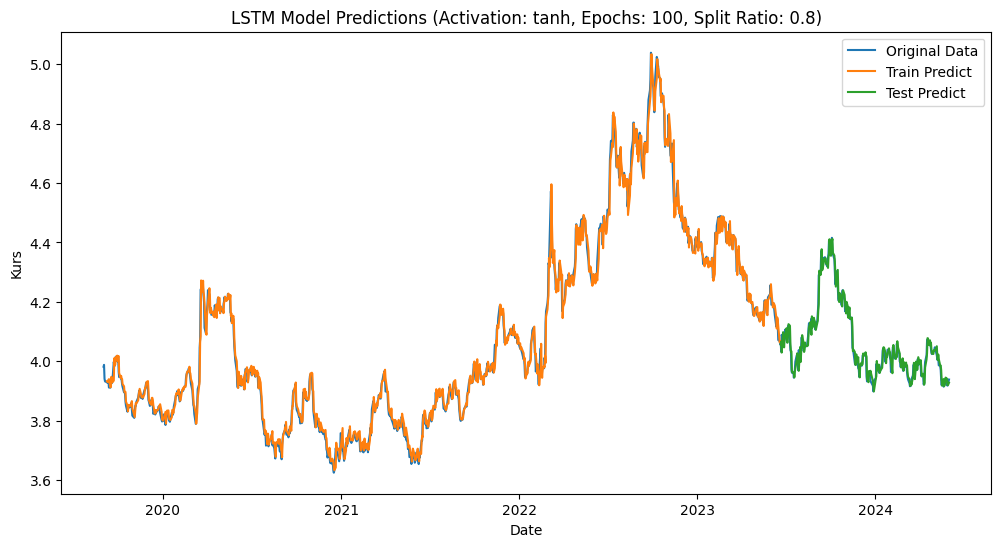

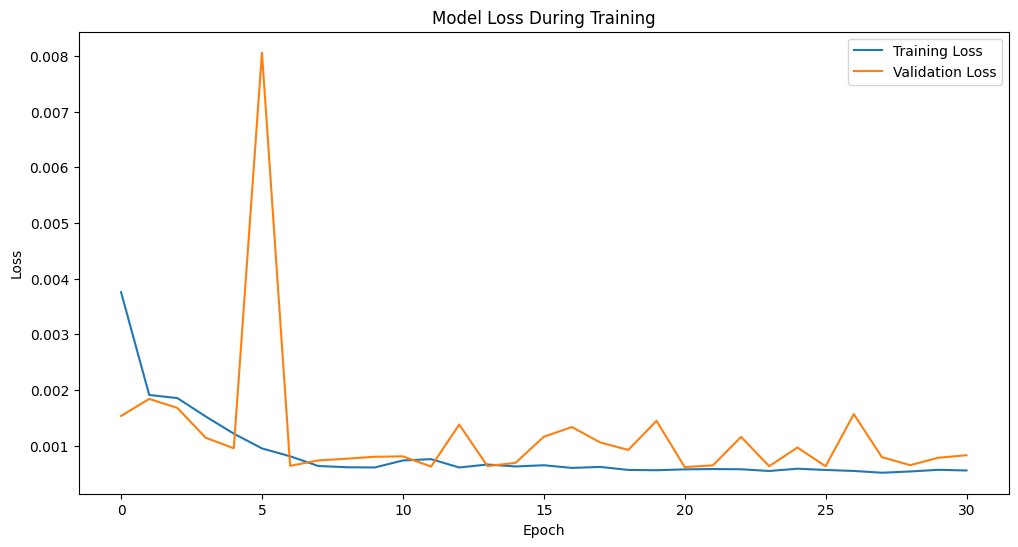

Testing configuration: {'look_back': 5, 'epochs': 50, 'activation': 'relu', 'split_ratio': 0.9}
Epoch 1/50


In [ ]:
# Function to create a dataset with look-back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Function to build, train and evaluate the model
def build_and_evaluate_model(look_back, epochs, activation, split_ratio):
    X, Y = create_dataset(scaled_kurs, look_back)

    # Split the data into training and testing sets
    train_size = int(len(X) * split_ratio)
    test_size = len(X) - train_size
    X_train, X_test = X[:train_size], X[train_size:]
    Y_train, Y_test = Y[:train_size], Y[train_size:]

    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))
    X_test = np.reshape(X_test, (X_test.shape[0], look_back, 1))

    # Build the model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, activation=activation, input_shape=(look_back, 1)))
    model.add(LSTM(50, activation=activation))
    model.add(Dense(1))

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Define early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=1, verbose=2, validation_split=0.2, callbacks=[early_stopping])

    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Invert predictions
    train_predict = scaler.inverse_transform(train_predict)
    Y_train = scaler.inverse_transform([Y_train])
    test_predict = scaler.inverse_transform(test_predict)
    Y_test = scaler.inverse_transform([Y_test])

    # Calculate RMSE
    train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
    test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))

    print(f'Train Score: {train_score:.2f} RMSE')
    print(f'Test Score: {test_score:.2f} RMSE')

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(data['Data'], kurs, label='Original Data')
    train_predict_plot = np.empty_like(kurs)
    train_predict_plot[:, :] = np.nan
    train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

    test_predict_plot = np.empty_like(kurs)
    test_predict_plot[:, :] = np.nan

    # Corrected calculation of indices for test predictions
    start_idx = len(train_predict) + look_back
    end_idx = start_idx + len(test_predict)

    # Limiting the length of test_predict to match the expected shape
    if len(test_predict) > 234:
        test_predict = test_predict[:234]

    # Now assign the limited test_predict to the plot array
    test_predict_plot[start_idx:end_idx, :] = test_predict

    plt.plot(data['Data'], train_predict_plot, label='Train Predict')
    plt.plot(data['Data'], test_predict_plot, label='Test Predict')
    plt.title(f'LSTM Model Predictions (Activation: {activation}, Epochs: {epochs}, Split Ratio: {split_ratio})')
    plt.xlabel('Date')
    plt.ylabel('Kurs')
    plt.legend()
    plt.show()

    # Plot RMSE
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Example configurations to test
configurations = [
    {'look_back': 5, 'epochs': 50, 'activation': 'relu', 'split_ratio': 0.8},
    {'look_back': 5, 'epochs': 100, 'activation': 'tanh', 'split_ratio': 0.8},
    {'look_back': 5, 'epochs': 50, 'activation': 'relu', 'split_ratio': 0.9},
    {'look_back': 5, 'epochs': 100, 'activation': 'sigmoid', 'split_ratio': 0.8}
]

# Test each configuration
for config in configurations:
    print(f"Testing configuration: {config}")
    build_and_evaluate_model(config['look_back'], config['epochs'], config['activation'], config['split_ratio'])



